# Notebook for the fitting of scaling laws

- For details see: 

-- Is this scaling non-linear?, from Jorge C. Leitão, José M. Miotto, Martin Gerlach, and Eduardo G. Altmann,
DOI: 10.1098/rsos.150649.
http://rsos.royalsocietypublishing.org/content/3/7/150649

- Remove results from folder "_results" to ensure original computations (instead of reading from stored results)

In [20]:
import analysis as a
import numpy as np
MIN_VALUE = 10**-8

%load_ext autoreload
%autoreload 2

%matplotlib inline
def summary(func):
    print(func.description,'\t Dataset:',func.dataset)
    print('Beta +- error:\t',func.beta)
    print('P-value:\t',func.p_value)
    print('BIC:\t\t',func.bic,'\n')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Choose the dataset 

- by setting the variable dataset="name"

- Pick one of the available datasets (write 'help' as the name of the dataset for a list)

- Or, add your csv dataset to the appropriate folder:

-- New dataset with three columns (name,x,y) = (city-name, population, observable) to folder new_dataset/

-- New dataset with two columns (x,y) = (population, observable) to folder new_dataset2/

In [92]:
dataset="usa_miles"

try:
    x=a.xy(dataset).x
    y=a.xy(dataset).y
except:
    print("Invalid Dataset Chosen. Available datasets are:\n")
    for i in a.DATABASES:
        print(i)

#Deleting all calculations for previously load new datasets
if dataset.startswith("new_dataset"):
    %rm _results/*new_dataset*

# Performing Analysis

 - Each line is one of the models, with specific constrains. Further constrains cna be fixed in each model.
 
 - This can take some time (at least a couple of minutes)

 - Increase the "required_successes=" parameter to increase precision (and computational time) 

## Log-Normal

In [93]:
ln = a.LogNormalAnalysis(dataset, required_successes=8)

In [94]:
ln_beta1=a.LogNormalFixedBetaAnalysis(dataset,required_successes=8)

In [95]:
ln_deltaf=a.LogNormalFixedDAnalysis(dataset,required_successes=8)

##  Gaussian

In [96]:
Gauss=a.ConstrainedDAnalysis(dataset,required_successes=8)

In [97]:
Gauss_beta1=a.ConstrainedDFixedBetaAnalysis(dataset,required_successes=8)

## Population

In [98]:
Pop=a.PopulationAnalysis(dataset,required_successes=8)

In [99]:
Pop2=a.PopulationFixedGammaAnalysis(dataset,required_successes=8)

# Outcome of the Analysis 

### Printing the outcomes

In [100]:
summary(ln)
summary(ln_beta1)
summary(ln_deltaf)
summary(Gauss)
summary(Gauss_beta1)
summary(Pop)
summary(Pop2)

print("\n Least Square fitting:",a.mls_best_fit(np.log(x),np.log(y)))

Log normal fluctuations with a general \delta 	 Dataset: usa_miles
Beta +- error:	 (0.8192628079796318, 0.030904363670818037)
P-value:	 4.01863122449e-24
BIC:		 6875.55344833 

Log normal fluctuations with \beta = 1 	 Dataset: usa_miles
Beta +- error:	 (1.0, 0.0)
P-value:	 6.3750725595e-25
BIC:		 6968.00488871 

Log normal fluctuations with \delta = 1 	 Dataset: usa_miles
Beta +- error:	 (0.84666747697133915, 0.028641550591788325)
P-value:	 1.80886899714e-19
BIC:		 6899.94757364 

Gaussian fluctuations with free \delta 	 Dataset: usa_miles
Beta +- error:	 (0.81380029027026324, 0.03831691091346532)
P-value:	 3.96246383146e-96
BIC:		 7064.25604953 

Gaussian fluctuations with \beta = 1 and free \delta 	 Dataset: usa_miles
Beta +- error:	 (1.0, 0.0)
P-value:	 5.49976659177e-106
BIC:		 7230.7105542 

People model with free \delta 	 Dataset: usa_miles
Beta +- error:	 (0.80712126076976476, 0.037774772044873499)
P-value:	 0.0
BIC:		 20207060.3818 

People model with \delta = 1 	 Dataset: usa_

### Plotting data 

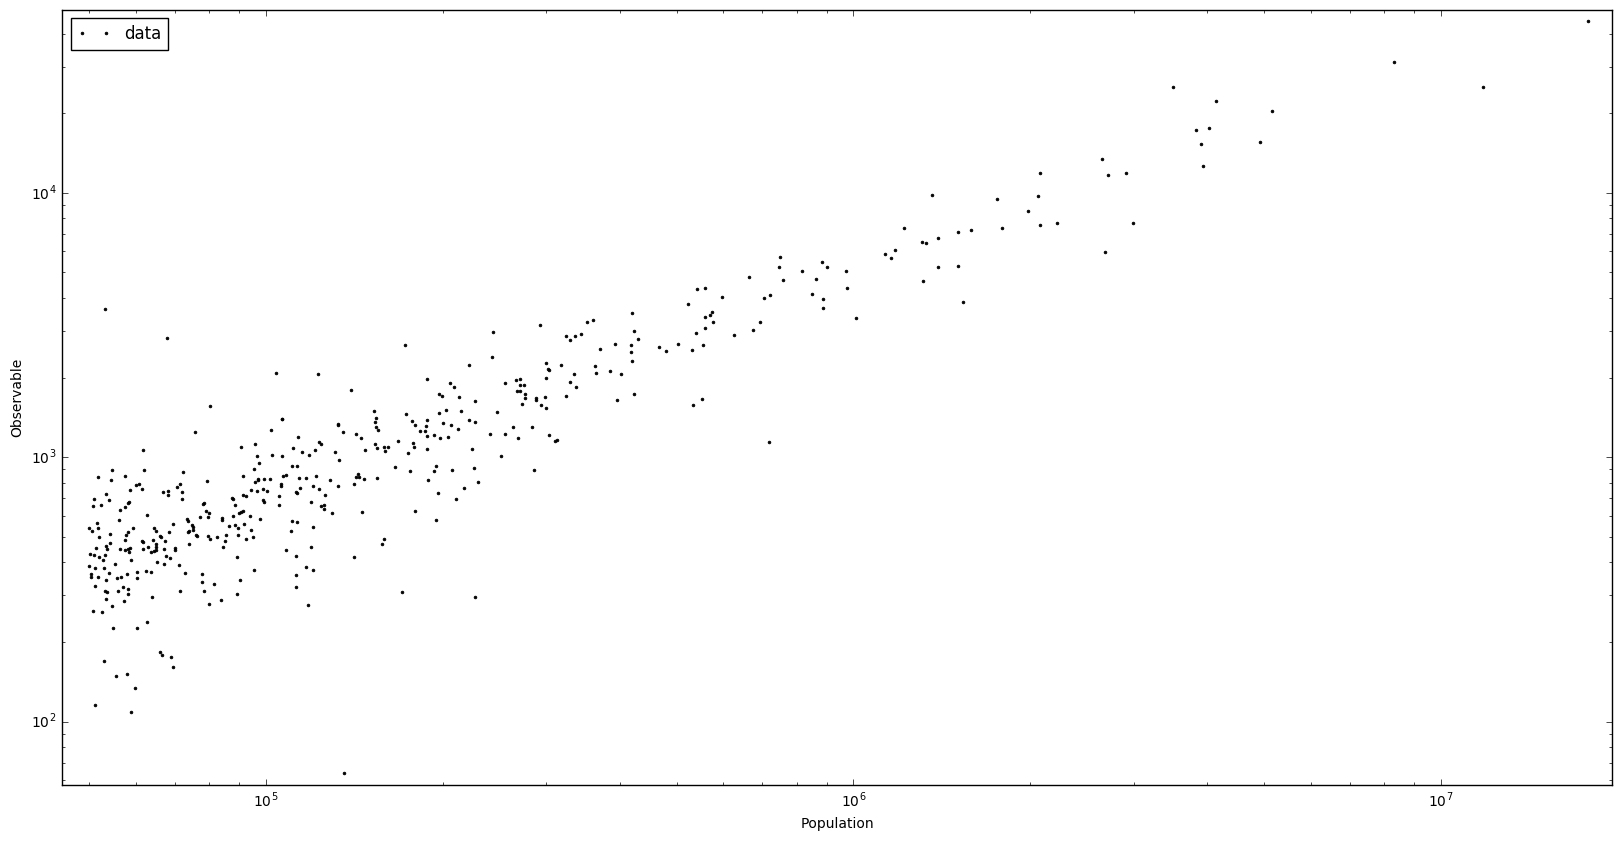

In [101]:
from matplotlib.pyplot import *
figure(figsize=(20,10))
xscale("log")
yscale("log")
xlim(0.9*min(x),1.1*max(x))
ylim(0.9*min(y),1.1*max(y))
plot(x, y, "o", ms=2,color="black",label="data")
xlabel("Population")
ylabel("Observable")
legend(loc=0)
show()